In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/DA314_S8_EmployeeAttrition_Data_Practice.csv')

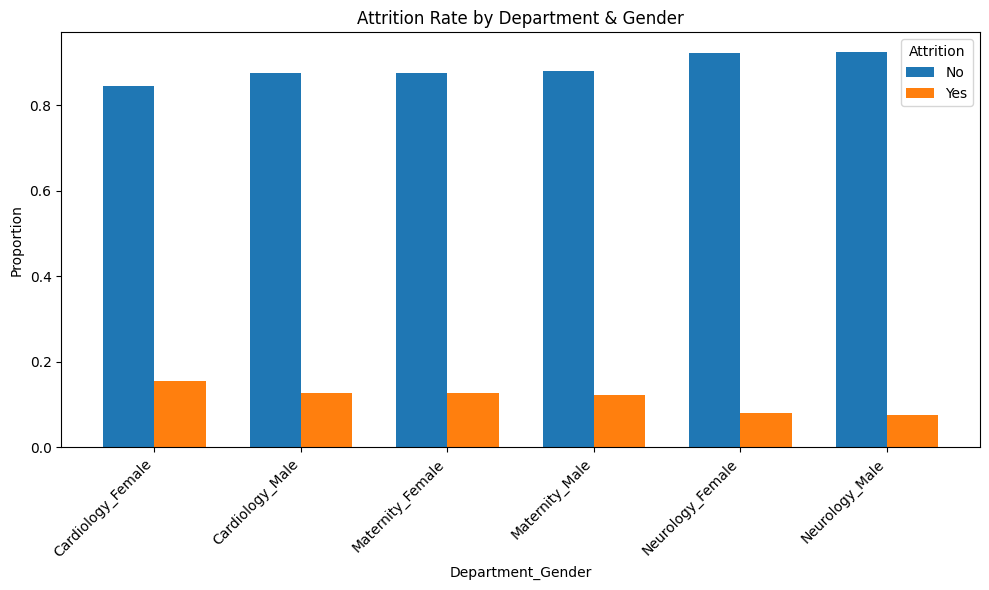

In [2]:
attrition_dept_gender = df.groupby(['Department', 'Gender', 'Attrition']).size().unstack(fill_value=0)
attrition_rate = attrition_dept_gender.div(attrition_dept_gender.sum(axis=1), axis=0)

dept_gender_combinations = df.groupby(['Department', 'Gender']).size().reset_index()[['Department', 'Gender']]
dept_gender_combinations['Dept_Gender'] = dept_gender_combinations['Department'] + '_' + dept_gender_combinations['Gender']

x = np.arange(len(dept_gender_combinations))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

no_rates = []
yes_rates = []
for _, row in dept_gender_combinations.iterrows():
    dept = row['Department']
    gender = row['Gender']
    no_rate = attrition_rate.loc[(dept, gender), 'No']
    yes_rate = attrition_rate.loc[(dept, gender), 'Yes']
    no_rates.append(no_rate)
    yes_rates.append(yes_rate)

bars1 = ax.bar(x - width/2, no_rates, width, label='No', color='#1f77b4')
bars2 = ax.bar(x + width/2, yes_rates, width, label='Yes', color='#ff7f0e')

ax.set_xlabel('Department_Gender')
ax.set_ylabel('Proportion')
ax.set_title('Attrition Rate by Department & Gender')
ax.set_xticks(x)
ax.set_xticklabels(dept_gender_combinations['Dept_Gender'], rotation=45, ha='right')
ax.legend(title='Attrition')
plt.tight_layout()
plt.show()

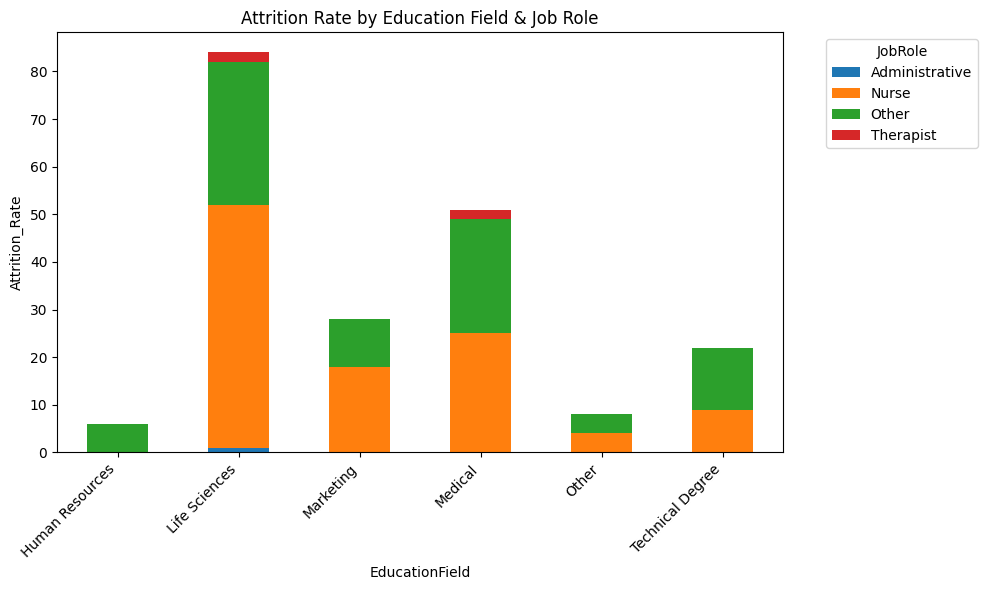

In [3]:
pivot_table = df[df['Attrition'] == 'Yes'].pivot_table(
    index='EducationField', 
    columns='JobRole', 
    values='EmployeeID', 
    aggfunc='count', 
    fill_value=0
)

pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), 
                 color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Attrition Rate by Education Field & Job Role')
plt.xlabel('EducationField')
plt.ylabel('Attrition_Rate')
plt.legend(title='JobRole', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()